In [77]:
# Step 1
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

# Step 2
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The data file is loaded into jupyter notebook and is loaded into the code to use. The above is used to inspect the structure of the dataset. In my observation, most of the columns' data type are proper, except for one, that is the **Age** with **float** data type.

In [78]:
# Step 3
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Using the code given above, missing values in columns are identified. Age has 177 missing values, Cabin has 687, and Embarked has 2.

In [84]:
# Step 4
# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)
# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)
# Fill Embarked with Mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
# Dropped Passenger ID
df.drop(columns=["PassengerId"], inplace=True)
# Dropped Name
df.drop(columns=["Name"], inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,S
1,1,1,female,38,1,0,PC 17599,71.2833,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35,1,0,113803,53.1000,S
4,0,3,male,35,0,0,373450,8.0500,S


To fill the missing values in **Age**, the median was used here. Consequently, I converted it from float into integer.

Cabin has too many missing values to use for drawing out results, therefore it was dropped.

Embarked has 2 missing values, I filled it with mode.

In [85]:
# Step 5
# Check for duplicates
df.duplicated().sum()
# Remove duplicates
df.drop_duplicates(inplace=True)

The code above is used to check for duplicates in the dataset. There were 0 duplicate. And just to be sure, if there were any,the duplicates are dropped.

In [86]:
# Step 6
# Convert Survived and Pclass to categorical
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

For the sake of cleaning, the survived and pclass column are converted into category type.

In [87]:
# Step 7
# Also, convert gender to lowercase
df["Sex"] = df["Sex"].str.lower()
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

The code above transforms the column names into lowercase. Also, I decided to apply lowercasing to values in **sex**.

In [90]:
# Step 8
df.to_csv("titanic_cleaned.csv", index=False)

After all the cleaning, the dataset is saved into a new file.

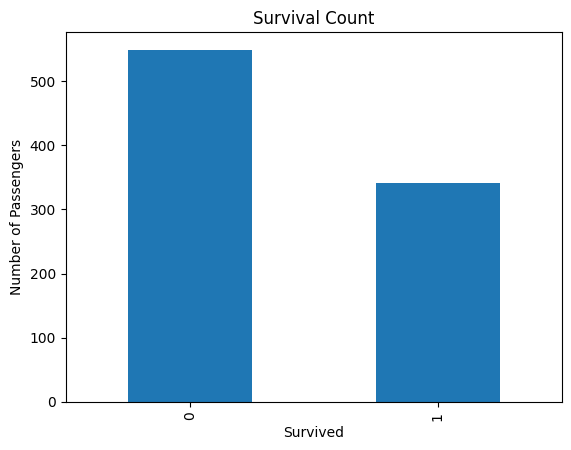

In [65]:
import matplotlib.pyplot as plt

df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

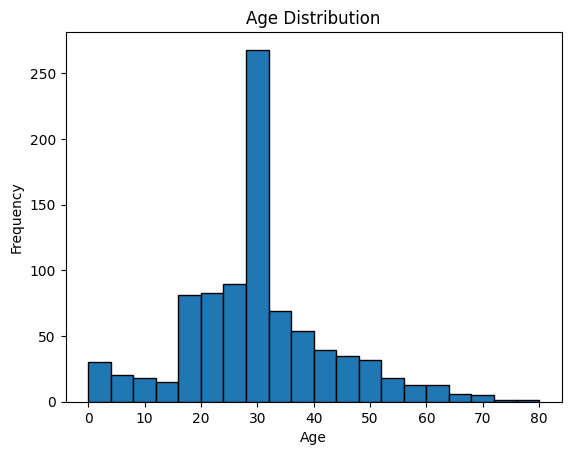

In [67]:
import matplotlib.pyplot as plt

df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

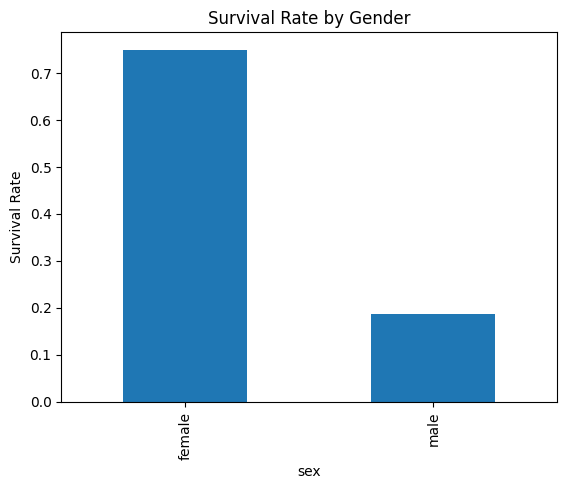

In [89]:
# GPT-corrected and generated code
# Having problems with using .mean() to categorical type column, changed it back to numeric
# Applied errors="coerce" to replace non-numeric values with 'NaN'

import matplotlib.pyplot as plt

df["survived"] = pd.to_numeric(df["survived"], errors="coerce")

df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

I will skip the retrieval of materials and go straight ahead in explaining the cleaning.

i. Load the dataset.

ii. Inspected the structure of data, found abnormality in **Age** data type. Will fix this later on.

iii. Search for missing values.

iv. Fill those missing values.

v. Determine useful data. Retain useful data. Drop the unnecessary data.

vi. Determine if there are data duplicates. Remove them if exists.

vii. Transform 'Survived' and 'Pclass' into **category** data type. Category data type consume less memory compared to int64, and more optimized in data processing.

viii. Transform values of Sex into lowercase to avoid inaccuracy to data. Also, transform column names into lowercase for standardized format.

ix. Finally, save the cleaned dataset.


This algorithm is used to handle missing values, correct data types, standardize formats, and remove irrelevant data. This are necessary steps in order to ensure accurate analysis and efficient data processing. Without cleaning, it could stem problems such as misleading patters, memory inefficiencies, and biased model predictions which would negatively affect results of the data.


2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.



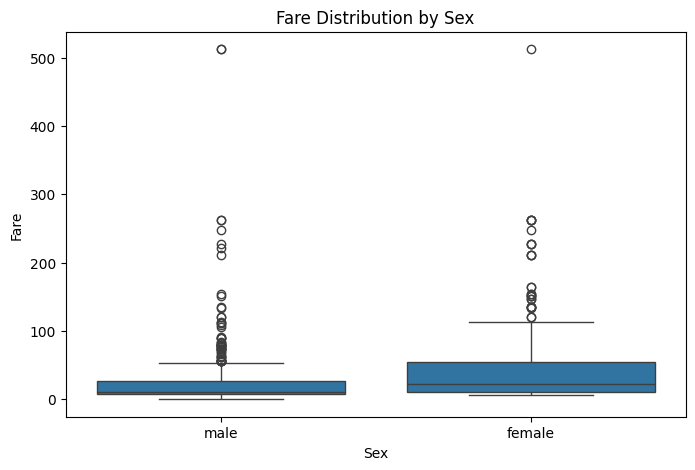

In [93]:
# Generated by ChatGPT
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of Fare grouped by Sex
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sex"], y=df["fare"])

# Add labels and title
plt.title("Fare Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Fare")

# Show the plot
plt.show()

Based on the data, females generally paid higher fares than males, as shown by the higher median and more outliers in the female fare distribution. This suggests that more women traveled in higher-class cabins, likely seeking a more comfortable atmosphere, which came with more expensive tickets. From a prejudiced viewpoint, one might argue that women enjoy a more luxurious lifestyle compared to men, as seen in their preference for lavish accessories with no practical use, while men are often content with using their arms as pillows.

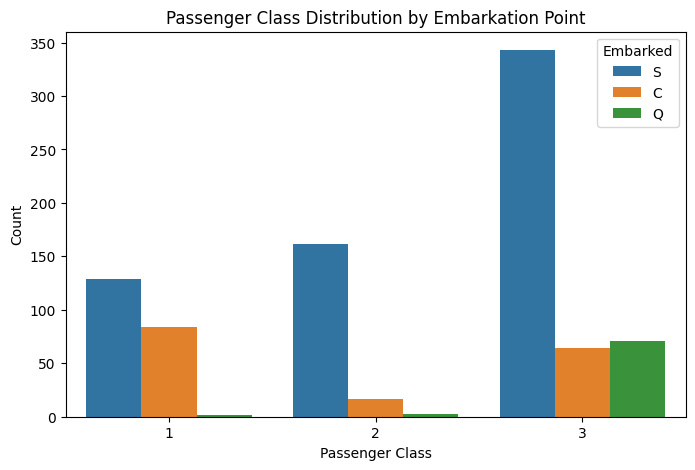

In [113]:
# Generated by ChatGPT
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df["pclass"], hue=df["embarked"])

# Add labels and title
plt.title("Passenger Class Distribution by Embarkation Point")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Embarked", loc="upper right")

# Show the plot
plt.show()


The fact that most passengers boarding from Southampton were in 3rd class suggests that Southampton was a key departure point for lower-income travelers, likely emigrants seeking a new life. While Cherbourg has the most 1st class passenger that boarded, this could mean that Cherbourg catered more to the wealthier passenger.